In [375]:
from MNIST_dataloader import Noisy_MNIST
from Fast_MRI_dataloader import Fast_MRI
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from torch.utils.data import TensorDataset
import glob
import numpy as np
from tqdm import tqdm 
from PIL import Image
from torch.fft import fft2, fftshift, ifft2

In [376]:
# %% dataloader for the Fast MRI dataset
def create_dataloaders_mri(data_loc, batch_size):
    dataset_train = Fast_MRI("train", data_loc)
    dataset_test  = Fast_MRI("test" , data_loc)
    
    Fast_MRI_train_loader =  DataLoader(dataset_train, batch_size=batch_size, shuffle=True,  drop_last=False)
    Fast_MRI_test_loader  =  DataLoader(dataset_test , batch_size=batch_size, shuffle=True, drop_last=False)
    
    return Fast_MRI_train_loader, Fast_MRI_test_loader

In [377]:
# Bram
data_loc = 'D://5LSL0-Datasets//Fast_MRI_Knee' #change the datalocation to something that works for you

# define parameters
batch_size = 8

train_loader, test_loader = create_dataloaders_mri(data_loc, batch_size)

# go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    if i == 1:
        break

  3%|▎         | 1/31 [00:00<00:05,  5.58it/s]


In [378]:
# Define function to achieve Full k-space
def get_k_space(inputs):
    # get the k-space
    k_space = fftshift(fft2(inputs))
    return k_space

In [379]:
# Define function to achieve Partial k-space from Full k-space and Mask
def get_partial_k_space(input,M):
    return  torch.mul(input, M)

In [380]:
# Define function Accelerated MRI from Partial k-space
def get_accelerate_MRI(inputs):
    return ifft2(inputs)

In [381]:
# Run Full k-space function
k_space = get_k_space(gt)
kspace_plot = torch.log(torch.abs(k_space[0,:,:])+1e-20)

In [382]:
# Run Partial k-sapce function
par_k_space = get_partial_k_space(k_space, M)
par_k_space_plot = torch.log(torch.abs(par_k_space[0,:,:])+1e-20)

In [383]:
# Run Accelerated MRI function
acc_mri = get_accelerate_MRI(par_k_space)
acc_mri_plot = torch.abs(acc_mri[0,:,:])


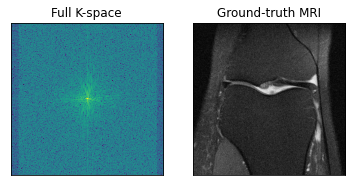

In [393]:
# Plot Full-K space and Ground truth
plt.figure

plt.subplot(1,2,1)
plt.imshow(kspace_plot,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Full K-space')

plt.subplot(1,2,2)
plt.imshow(gt[4,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Ground-truth MRI')

plt.savefig("GT_FULL-K.png",dpi=500)
plt.show()

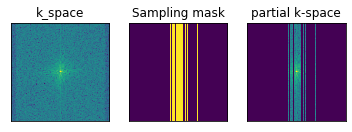

In [385]:
# Plot Full k-space Mask and partial k-space
plt.figure

plt.subplot(1,3,1)
plt.imshow(kspace_plot,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,3,2)
plt.imshow(M[0,:,:],interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Sampling mask')

plt.subplot(1,3,3)
plt.imshow(par_k_space_plot,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space')

plt.savefig("Full_k_M_par_k.png",dpi=500,bbox_inches='tight')
plt.show()

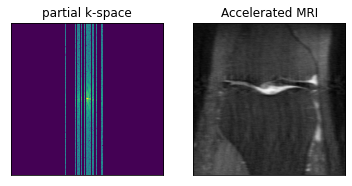

In [386]:
plt.figure

plt.subplot(1,2,1)
plt.imshow(par_k_space_plot,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space')

plt.subplot(1,2,2)
plt.imshow(acc_mri_plot,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Accelerated MRI')

plt.savefig("Acc_mri_par_k.png",dpi=500,bbox_inches='tight')
plt.show()

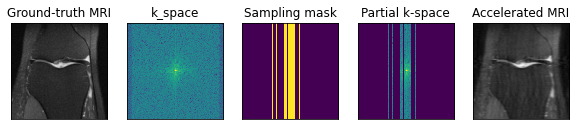

In [391]:
# plot pipeline figure
plt.figure(figsize=(10,10))

plt.subplot(1,5,1)
plt.imshow(gt[4,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Ground-truth MRI')

plt.subplot(1,5,2)
plt.imshow(kspace_plot,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,5,3)
plt.imshow(M[0,:,:],interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Sampling mask')

plt.subplot(1,5,4)
plt.imshow(par_k_space_plot,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Partial k-space')

plt.subplot(1,5,5)
plt.imshow(acc_mri_plot,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Accelerated MRI')


plt.savefig("Pipeline_fig_3d.png",dpi=500,bbox_inches='tight')
plt.show()